In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KTDL/Credit_Score_Classification.csv")

df

,Unnamed: 0,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,1,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0
1,1,2,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,31.944960,265.0,1,49.574949,118.280222,3,284.629162,0
2,2,3,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0
3,3,4,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0
4,4,5,23,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,4,25,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,34.663572,378.0,1,35.104023,60.971333,0,393.788917,1
99996,99996,5,25,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,40.565631,379.0,1,35.104023,54.185950,1,393.788917,1
99997,99997,6,25,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,41.255522,380.0,1,35.104023,24.028477,0,393.788917,1
99998,99998,7,25,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,1,502.38,33.638208,381.0,1,35.104023,251.672582,3,393.788917,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100000 non-null  int64  
 1   Month                     100000 non-null  int64  
 2   Age                       100000 non-null  int64  
 3   Occupation                100000 non-null  int64  
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              100000 non-null  int64  
 11  Delay_from_due_date       100000 non-null  float64
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  fl

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

# Heatmap

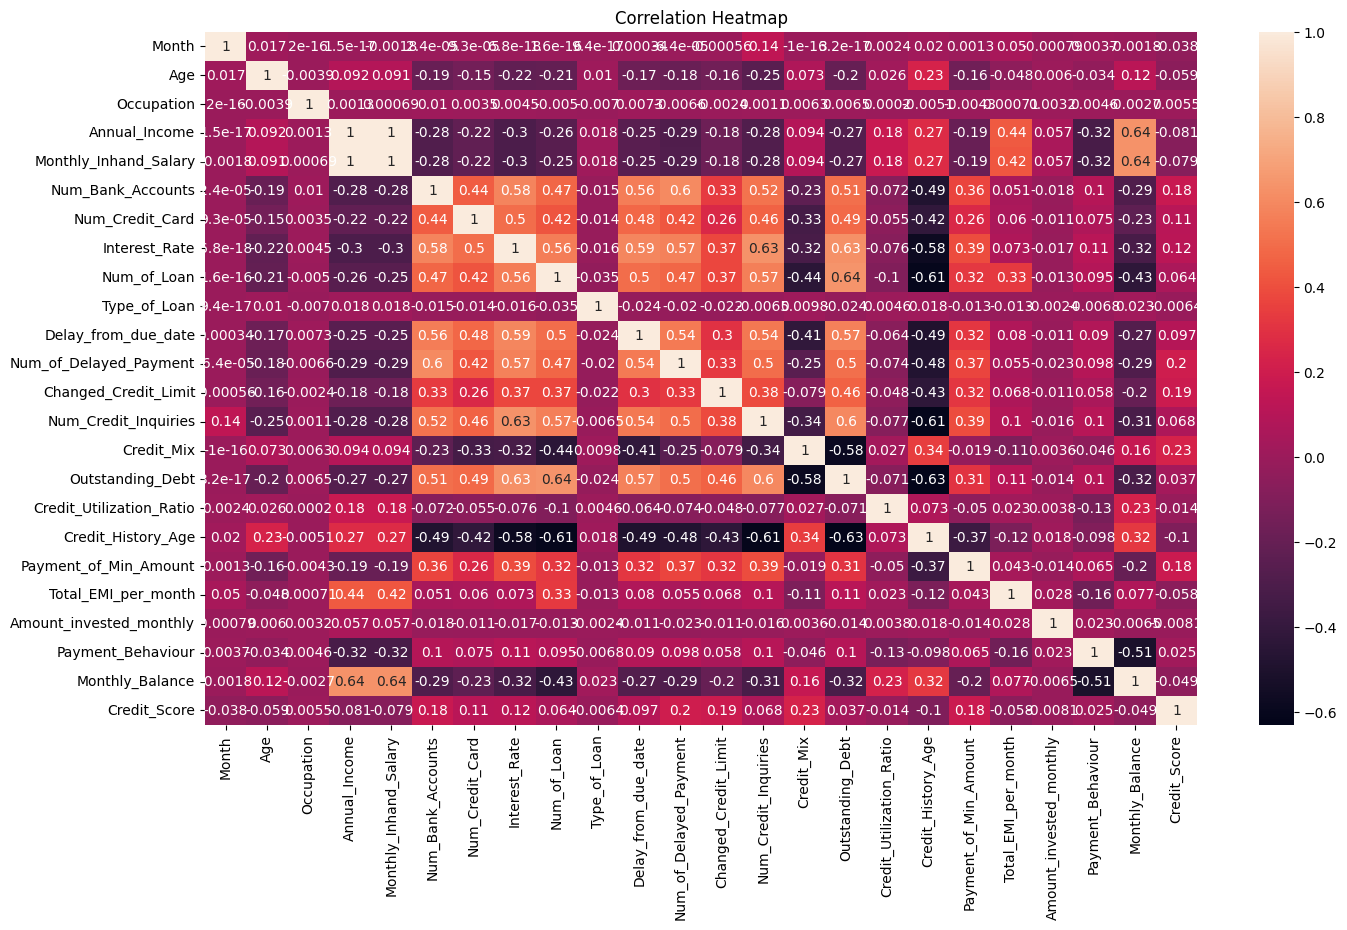

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(numeric_only=True,method='pearson'), annot=True)

plt.title('Correlation Heatmap')
plt.show()

# Train Split Data

In [ ]:
print("Number of data:",len(df))

Number of data: 100000


In [ ]:
features = df.drop('Credit_Score', axis=1)
labels = df['Credit_Score']

X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=0.3,random_state=42)

# DecisionTree

## ID3

In [ ]:
start_ID3 = time.process_time()
clf_entropy = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train Decision Tree Classifer
clf_entropy.fit(X_train, y_train)
end_ID3 = time.process_time()
time_id3 = []
time_id3.append(end_ID3 - start_ID3)

#Predict the response for test dataset
train_pred_entropy = clf_entropy.predict(X_train)
test_pred_entropy = clf_entropy.predict(X_test)

#Model Accuracy, how often is the classifre correct?
train_accuracy_entropy = metrics.accuracy_score(y_train, train_pred_entropy)
test_accuracy_entropy = metrics.accuracy_score(y_test, test_pred_entropy)

print("Time Process:", end_ID3 - start_ID3)
print("Accuracy on training set:", train_accuracy_entropy)
print("Accuracy on test set:", test_accuracy_entropy)
print("Report:", metrics.classification_report(y_test, test_pred_entropy))

Time Process: 2.515769023999999
Accuracy on training set: 1.0
Accuracy on test set: 0.7353333333333333
Report:               precision    recall  f1-score   support

           0       0.69      0.68      0.68      5322
           1       0.72      0.71      0.72      8805
           2       0.76      0.77      0.76     15873

    accuracy                           0.74     30000
   macro avg       0.72      0.72      0.72     30000
weighted avg       0.74      0.74      0.74     30000



Text(0.5, 1.0, 'Decision Tree ID3 Accuracy Score: 0.7353333333333333')

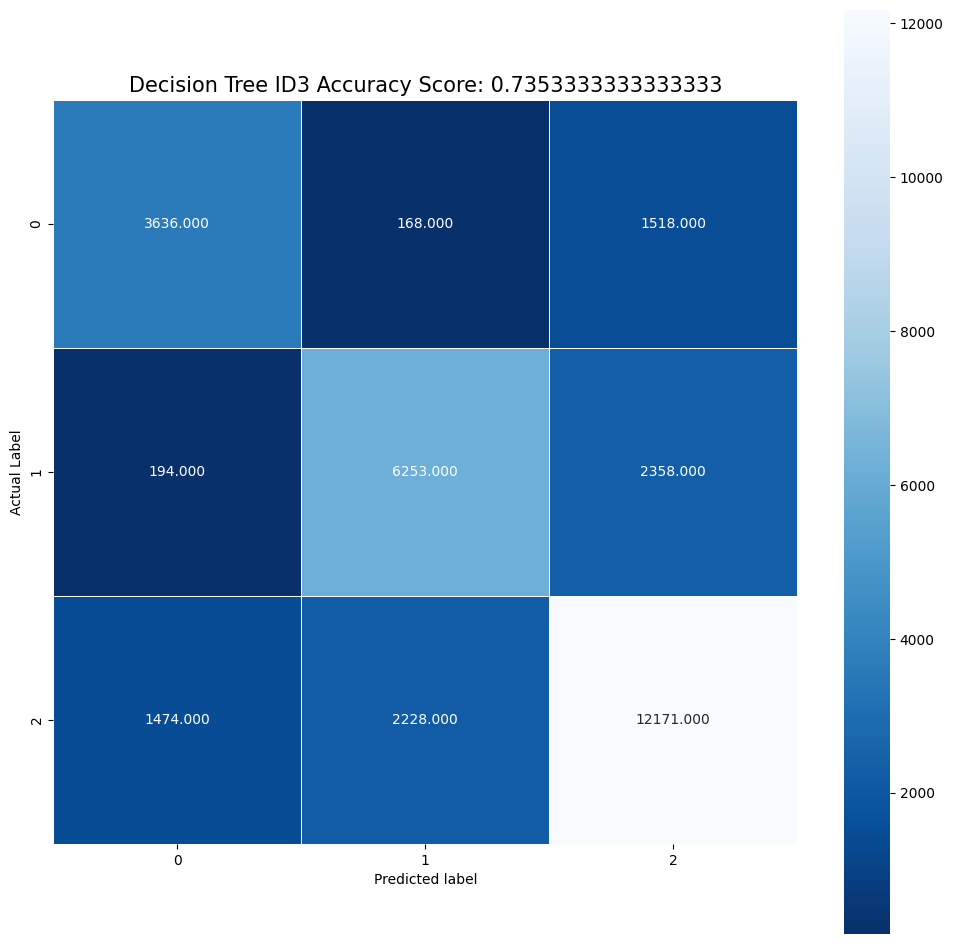

In [ ]:
#Confusion Matrix
cm_id3 = metrics.confusion_matrix(y_test, test_pred_entropy)

#Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(cm_id3, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
title = 'Decision Tree ID3 Accuracy Score: {0}'.format(test_accuracy_entropy)
plt.title(title, size=15)

In [ ]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf_entropy, filled=True, fontsize=10)
plt.savefig('decision_tree_entropy',dpi=100)
plt.show()

## CART

In [ ]:
start_CART = time.time()
clf_gini = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
#Train Decision Tree Classifer
clf_gini.fit(X_train, y_train)
end_CART = time.time()
time_cart = []
time_cart.append(end_CART - start_CART)

#Predict the response for test dataset
train_pred_gini = clf_gini.predict(X_train)
test_pred_gini = clf_gini.predict(X_test)

#Model Accuracy, how often is the classifre correct?
train_accuracy_gini = metrics.accuracy_score(y_train, train_pred_gini)
test_accuracy_gini = metrics.accuracy_score(y_test, test_pred_gini)

print("Time Process:", end_ID3 - start_ID3)
print("Accuracy on training set:", train_accuracy_gini)
print("Accuracy on test set:", test_accuracy_gini)
print("Report:", metrics.classification_report(y_test, test_pred_gini))

Time Process: 2.515769023999999
Accuracy on training set: 1.0
Accuracy on test set: 0.7291
Report:               precision    recall  f1-score   support

           0       0.68      0.67      0.67      5322
           1       0.71      0.71      0.71      8805
           2       0.76      0.76      0.76     15873

    accuracy                           0.73     30000
   macro avg       0.72      0.71      0.71     30000
weighted avg       0.73      0.73      0.73     30000



Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.7291')

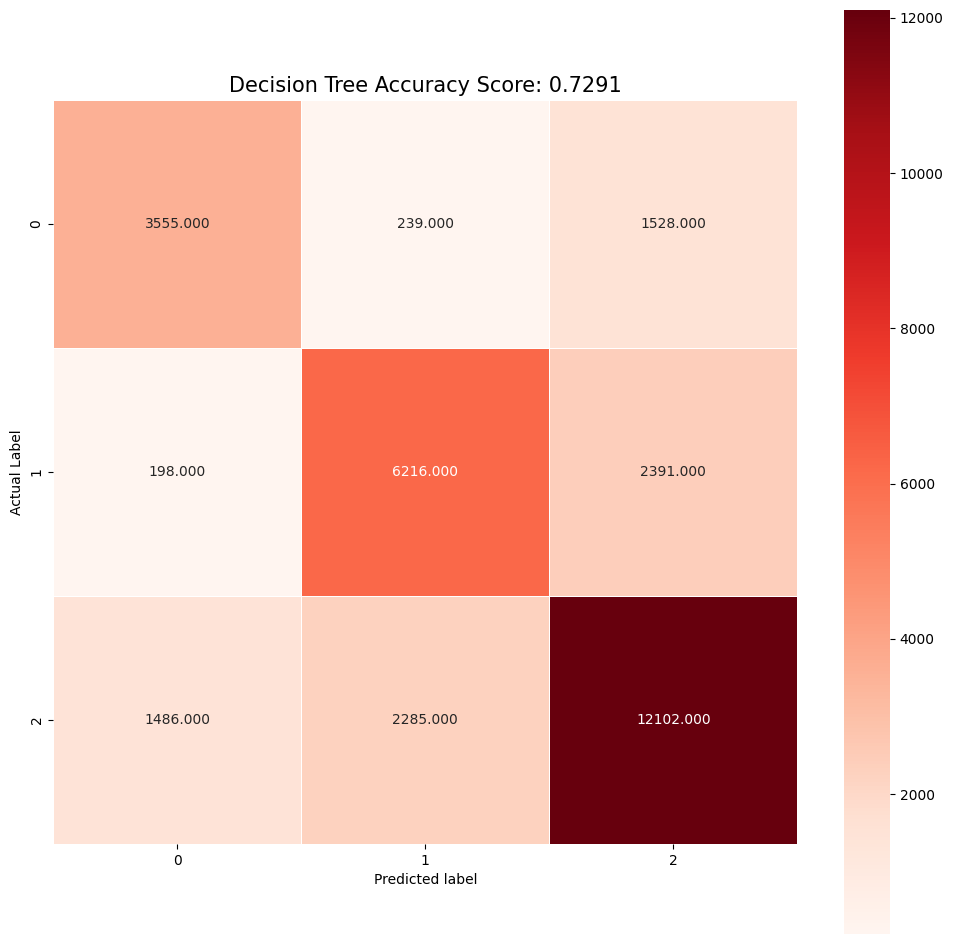

In [ ]:
#Confusion Metric
cm_gini = metrics.confusion_matrix(y_test, test_pred_gini)

#Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(cm_gini, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Reds')
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
title = 'Decision Tree Accuracy Score: {0}'.format(test_accuracy_gini)
plt.title(title, size=15)

In [ ]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf_gini, filled=True, fontsize=10)
plt.savefig('decision_tree_gini',dpi=100)
plt.show()

# Naive Bayes

In [ ]:
start_NB = time.time()
gnb = GaussianNB()
#Train Decision Tree Classifer
gnb.fit(X_train, y_train)
end_NB = time.time()
time_nb = []
time_nb.append(end_NB - start_NB)

#Predict the response for test dataset
train_pred_nb = gnb.predict(X_train)
test_pred_nb = gnb.predict(X_test)

#Model Accuracy, how often is the classifre correct?
train_accuracy_nb = metrics.accuracy_score(y_train, train_pred_nb)
test_accuracy_nb = metrics.accuracy_score(y_test, test_pred_nb)

#Model Accuracy, how often is the classifre correct?
print("Time Process:", end_NB - start_NB)
print("Accuracy on training set:", train_accuracy_nb)
print("Accuracy on test set:", test_accuracy_nb)
print("Report:", metrics.classification_report(y_test, test_pred_nb))

Time Process: 0.04678511619567871
Accuracy on training set: 0.6053285714285714
Accuracy on test set: 0.6008333333333333
Report:               precision    recall  f1-score   support

           0       0.41      0.82      0.54      5322
           1       0.63      0.71      0.67      8805
           2       0.79      0.47      0.59     15873

    accuracy                           0.60     30000
   macro avg       0.61      0.66      0.60     30000
weighted avg       0.68      0.60      0.60     30000



Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.6008333333333333')

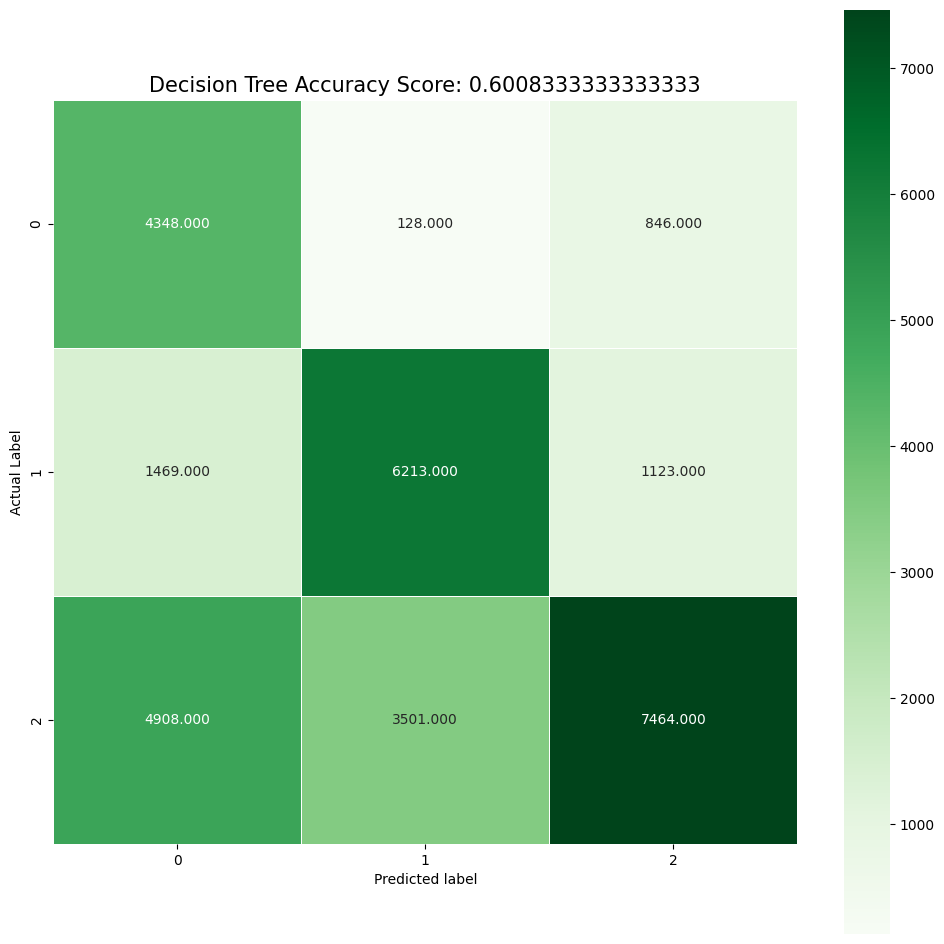

In [ ]:
#Confusion metric
cm_nb = metrics.confusion_matrix(y_test, test_pred_nb)

#Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(cm_nb, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Greens')
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
title = 'Decision Tree Accuracy Score: {0}'.format(test_accuracy_nb)
plt.title(title, size=15)